In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import re
from nltk.probability import FreqDist

In [ ]:
nltk.download('machado')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package machado to /home/alysson/nltk_data...
[nltk_data]   Package machado is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alysson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/alysson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# retorna lista de stopwords em portugues
stopwords = nltk.corpus.stopwords.words('portuguese')

In [ ]:
# id do corpus 
# no nosso caso estamos usando id machado
nltk_id = 'machado'

In [ ]:
# eh necessario baixar o corpus
nltk.download(nltk_id)

[nltk_data] Downloading package machado to /home/alysson/nltk_data...
[nltk_data]   Package machado is already up-to-date!


True

In [ ]:
# agora o corpus esta acessivel 
# visualizando as obras disponiveis
print(nltk.corpus.machado.readme())


Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

In [ ]:
# ou
print(nltk.corpus.machado.fileids())

['contos/macn001.txt', 'contos/macn002.txt', 'contos/macn003.txt', 'contos/macn004.txt', 'contos/macn005.txt', 'contos/macn006.txt', 'contos/macn007.txt', 'contos/macn008.txt', 'contos/macn009.txt', 'contos/macn010.txt', 'contos/macn011.txt', 'contos/macn012.txt', 'contos/macn013.txt', 'contos/macn014.txt', 'contos/macn015.txt', 'contos/macn016.txt', 'contos/macn017.txt', 'contos/macn018.txt', 'contos/macn019.txt', 'contos/macn020.txt', 'contos/macn021.txt', 'contos/macn022.txt', 'contos/macn023.txt', 'contos/macn024.txt', 'contos/macn025.txt', 'contos/macn026.txt', 'contos/macn027.txt', 'contos/macn028.txt', 'contos/macn029.txt', 'contos/macn030.txt', 'contos/macn031.txt', 'contos/macn032.txt', 'contos/macn033.txt', 'contos/macn034.txt', 'contos/macn035.txt', 'contos/macn036.txt', 'contos/macn037.txt', 'contos/macn038.txt', 'contos/macn039.txt', 'contos/macn040.txt', 'contos/macn041.txt', 'contos/macn042.txt', 'contos/macn043.txt', 'contos/macn044.txt', 'contos/macn045.txt', 'contos/m

In [ ]:
# apos escolher a obra
# salvamos a string em uma variavel
dom_casmurro = nltk.corpus.machado.raw('romance/marm08.txt')


In [ ]:
# stemmatizando com Lancaster
lancaster = nltk.LancasterStemmer()
[lancaster.stem(t) for t in dom_casmurro]

['r',
 'o',
 'm',
 'a',
 'n',
 'c',
 'e',
 ',',
 ' ',
 'd',
 'o',
 'm',
 ' ',
 'c',
 'a',
 's',
 'm',
 'u',
 'r',
 'r',
 'o',
 ',',
 ' ',
 '1',
 '8',
 '9',
 '9',
 '\n',
 '\n',
 'd',
 'o',
 'm',
 ' ',
 'c',
 'a',
 's',
 'm',
 'u',
 'r',
 'r',
 'o',
 '\n',
 '\n',
 't',
 'e',
 'x',
 't',
 'o',
 ' ',
 'd',
 'e',
 ' ',
 'r',
 'e',
 'f',
 'e',
 'r',
 'ê',
 'n',
 'c',
 'i',
 'a',
 ':',
 '\n',
 '\n',
 'o',
 'b',
 'r',
 'a',
 's',
 ' ',
 'c',
 'o',
 'm',
 'p',
 'l',
 'e',
 't',
 'a',
 's',
 ' ',
 'd',
 'e',
 ' ',
 'm',
 'a',
 'c',
 'h',
 'a',
 'd',
 'o',
 ' ',
 'd',
 'e',
 ' ',
 'a',
 's',
 's',
 'i',
 's',
 ',',
 '\n',
 'v',
 'o',
 'l',
 '.',
 ' ',
 'i',
 ',',
 '\n',
 '\n',
 'n',
 'o',
 'v',
 'a',
 ' ',
 'a',
 'g',
 'u',
 'i',
 'l',
 'a',
 'r',
 ',',
 ' ',
 'r',
 'i',
 'o',
 ' ',
 'd',
 'e',
 '\n',
 'j',
 'a',
 'n',
 'e',
 'i',
 'r',
 'o',
 ',',
 ' ',
 '1',
 '9',
 '9',
 '4',
 '.',
 '\n',
 '\n',
 '\xa0',
 'p',
 'u',
 'b',
 'l',
 'i',
 'c',
 'a',
 'd',
 'o',
 ' ',
 'o',
 'r',
 'i',
 'g',
 'i',
 

In [ ]:
# stemmatizando com Porter
porter = nltk.PorterStemmer()
[porter.stem(t) for t in dom_casmurro]


['r',
 'o',
 'm',
 'a',
 'n',
 'c',
 'e',
 ',',
 ' ',
 'd',
 'o',
 'm',
 ' ',
 'c',
 'a',
 's',
 'm',
 'u',
 'r',
 'r',
 'o',
 ',',
 ' ',
 '1',
 '8',
 '9',
 '9',
 '\n',
 '\n',
 'd',
 'o',
 'm',
 ' ',
 'c',
 'a',
 's',
 'm',
 'u',
 'r',
 'r',
 'o',
 '\n',
 '\n',
 't',
 'e',
 'x',
 't',
 'o',
 ' ',
 'd',
 'e',
 ' ',
 'r',
 'e',
 'f',
 'e',
 'r',
 'ê',
 'n',
 'c',
 'i',
 'a',
 ':',
 '\n',
 '\n',
 'o',
 'b',
 'r',
 'a',
 's',
 ' ',
 'c',
 'o',
 'm',
 'p',
 'l',
 'e',
 't',
 'a',
 's',
 ' ',
 'd',
 'e',
 ' ',
 'm',
 'a',
 'c',
 'h',
 'a',
 'd',
 'o',
 ' ',
 'd',
 'e',
 ' ',
 'a',
 's',
 's',
 'i',
 's',
 ',',
 '\n',
 'v',
 'o',
 'l',
 '.',
 ' ',
 'i',
 ',',
 '\n',
 '\n',
 'n',
 'o',
 'v',
 'a',
 ' ',
 'a',
 'g',
 'u',
 'i',
 'l',
 'a',
 'r',
 ',',
 ' ',
 'r',
 'i',
 'o',
 ' ',
 'd',
 'e',
 '\n',
 'j',
 'a',
 'n',
 'e',
 'i',
 'r',
 'o',
 ',',
 ' ',
 '1',
 '9',
 '9',
 '4',
 '.',
 '\n',
 '\n',
 '\xa0',
 'p',
 'u',
 'b',
 'l',
 'i',
 'c',
 'a',
 'd',
 'o',
 ' ',
 'o',
 'r',
 'i',
 'g',
 'i',
 

In [ ]:
# lemmatizando com wordnet
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in dom_casmurro]

['R',
 'o',
 'm',
 'a',
 'n',
 'c',
 'e',
 ',',
 ' ',
 'D',
 'o',
 'm',
 ' ',
 'C',
 'a',
 's',
 'm',
 'u',
 'r',
 'r',
 'o',
 ',',
 ' ',
 '1',
 '8',
 '9',
 '9',
 '\n',
 '\n',
 'D',
 'o',
 'm',
 ' ',
 'C',
 'a',
 's',
 'm',
 'u',
 'r',
 'r',
 'o',
 '\n',
 '\n',
 'T',
 'e',
 'x',
 't',
 'o',
 ' ',
 'd',
 'e',
 ' ',
 'r',
 'e',
 'f',
 'e',
 'r',
 'ê',
 'n',
 'c',
 'i',
 'a',
 ':',
 '\n',
 '\n',
 'O',
 'b',
 'r',
 'a',
 's',
 ' ',
 'C',
 'o',
 'm',
 'p',
 'l',
 'e',
 't',
 'a',
 's',
 ' ',
 'd',
 'e',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'a',
 'd',
 'o',
 ' ',
 'd',
 'e',
 ' ',
 'A',
 's',
 's',
 'i',
 's',
 ',',
 '\n',
 'v',
 'o',
 'l',
 '.',
 ' ',
 'I',
 ',',
 '\n',
 '\n',
 'N',
 'o',
 'v',
 'a',
 ' ',
 'A',
 'g',
 'u',
 'i',
 'l',
 'a',
 'r',
 ',',
 ' ',
 'R',
 'i',
 'o',
 ' ',
 'd',
 'e',
 '\n',
 'J',
 'a',
 'n',
 'e',
 'i',
 'r',
 'o',
 ',',
 ' ',
 '1',
 '9',
 '9',
 '4',
 '.',
 '\n',
 '\n',
 '\xa0',
 'P',
 'u',
 'b',
 'l',
 'i',
 'c',
 'a',
 'd',
 'o',
 ' ',
 'o',
 'r',
 'i',
 'g',
 'i',
 

In [ ]:
tokens = word_tokenize(dom_casmurro)
print(tokens)

['Romance', ',', 'Dom', 'Casmurro', ',', '1899', 'Dom', 'Casmurro', 'Texto', 'de', 'referência', ':', 'Obras', 'Completas', 'de', 'Machado', 'de', 'Assis', ',', 'vol', '.', 'I', ',', 'Nova', 'Aguilar', ',', 'Rio', 'de', 'Janeiro', ',', '1994', '.', 'Publicado', 'originalmente', 'pela', 'Editora', 'Garnier', ',', 'Rio', 'de', 'Janeiro', ',', '1899', '.', 'CAPÍTULO', 'PRIMEIRO', 'DO', 'TÍTULO', 'Uma', 'noite', 'destas', ',', 'vindo', 'da', 'cidade', 'para', 'o', 'Engenho', 'Novo', ',', 'encontrei', 'no', 'trem', 'da', 'Central', 'um', 'rapaz', 'aqui', 'do', 'bairro', ',', 'que', 'eu', 'conheço', 'de', 'vista', 'e', 'de', 'chapéu', '.', 'Cumprimentou-me', ',', 'sentou-se', 'ao', 'pé', 'de', 'mim', ',', 'falou', 'da', 'Lua', 'e', 'dos', 'ministros', ',', 'e', 'acabou', 'recitando-me', 'versos', '.', 'A', 'viagem', 'era', 'curta', ',', 'e', 'os', 'versos', 'pode', 'ser', 'que', 'não', 'fossem', 'inteiramente', 'maus', '.', 'Sucedeu', ',', 'porém', ',', 'que', ',', 'como', 'eu', 'estava', 'c

In [ ]:
sent_tokens = sent_tokenize(dom_casmurro)
print(sent_tokens)

['Romance, Dom Casmurro, 1899\n\nDom Casmurro\n\nTexto de referência:\n\nObras Completas de Machado de Assis,\nvol.', 'I,\n\nNova Aguilar, Rio de\nJaneiro, 1994.', 'Publicado originalmente\npela Editora Garnier, Rio de Janeiro, 1899.', 'CAPÍTULO PRIMEIRO\n\nDO TÍTULO\n\nUma noite destas, vindo da cidade\npara o Engenho Novo, encontrei no trem da Central um rapaz aqui do bairro, que\neu conheço de vista e de chapéu.', 'Cumprimentou-me, sentou-se ao pé de mim, falou\nda Lua e dos ministros, e acabou recitando-me versos.', 'A viagem era curta, e os\nversos pode ser que não fossem inteiramente maus.', 'Sucedeu, porém, que, como eu\nestava cansado, fechei os olhos três ou quatro vezes; tanto bastou para que ele\ninterrompesse a leitura e metesse os versos no bolso.', '\x97 Continue, disse eu acordando.', '\x97 Já acabei, murmurou ele.', '\x97 São muito bonitos.', 'Vi-lhe fazer um gesto para\ntirá-los outra vez do bolso, mas não passou do gesto; estava amuado.', 'No dia seguinte\nentrou a di

In [ ]:
def pre_processamento(texto):
  
    # seleciona apenas letras e coloca todas em minúsculo 
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # remove stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    sem_stopwords = [w for w in letras_min if w not in stop]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

In [ ]:
# corpus dom casmurro
corpus_dom_casmurro = nltk.corpus.machado.raw('romance/marm08.txt')


In [ ]:
# pre processamento
texto = pre_processamento(corpus_dom_casmurro)

In [ ]:
# tokenizando 
tokens = word_tokenize(texto)

In [ ]:
# contagem de frequencia
fd = FreqDist(tokens)
print("20 palavras mais frequentes:")
print(fd.most_common(20))

20 palavras mais frequentes:
[('capitu', 341), ('mãe', 229), ('dias', 192), ('tudo', 189), ('capítulo', 188), ('disse', 184), ('casa', 170), ('olhos', 164), ('mim', 162), ('josé', 160), ('assim', 158), ('vez', 147), ('agora', 146), ('ainda', 141), ('outra', 138), ('nada', 135), ('lo', 127), ('tão', 122), ('tempo', 120), ('padre', 119)]


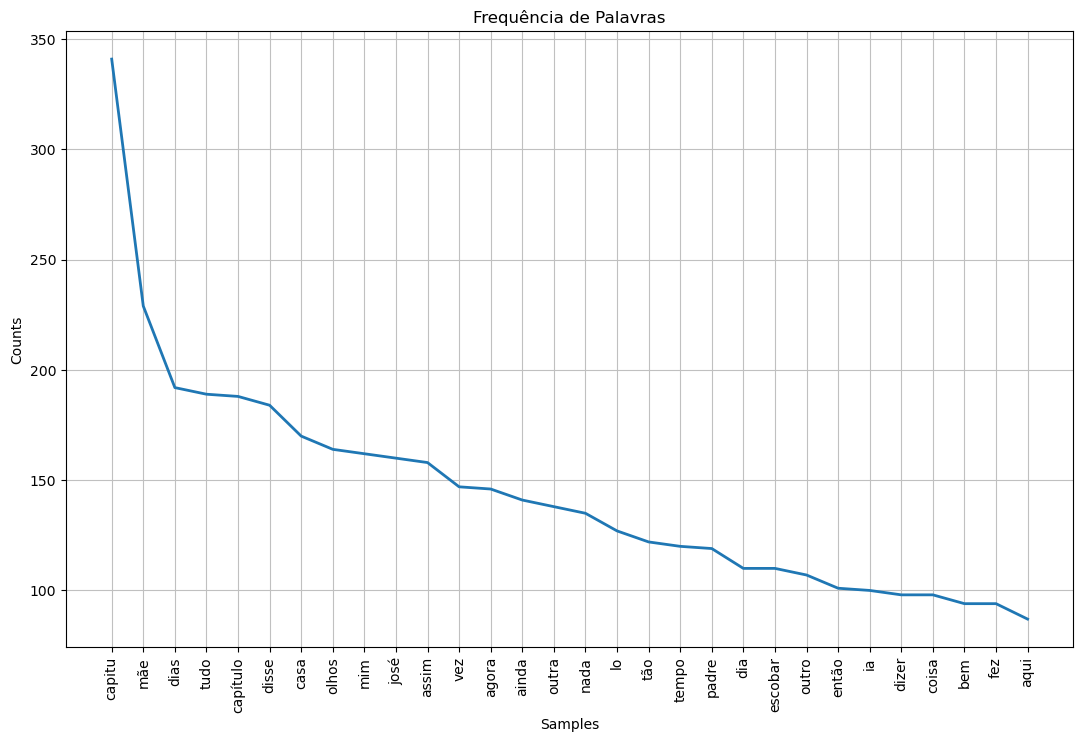

<AxesSubplot:title={'center':'Frequência de Palavras'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# plot
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 8))
fd.plot(30, title = "Frequência de Palavras")